# Exercises

- Within your codeup-data-science directory, create a new repo named anomaly-detection-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

- Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.

- continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


1) Using lemonade.csv dataset and focusing on continuous variables:
   
   - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
   
   - Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

   - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

   - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.shape

(365, 7)

In [4]:
df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df = df.set_index('Date')

In [7]:
df['Month'] = df.index.month_name()

In [8]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


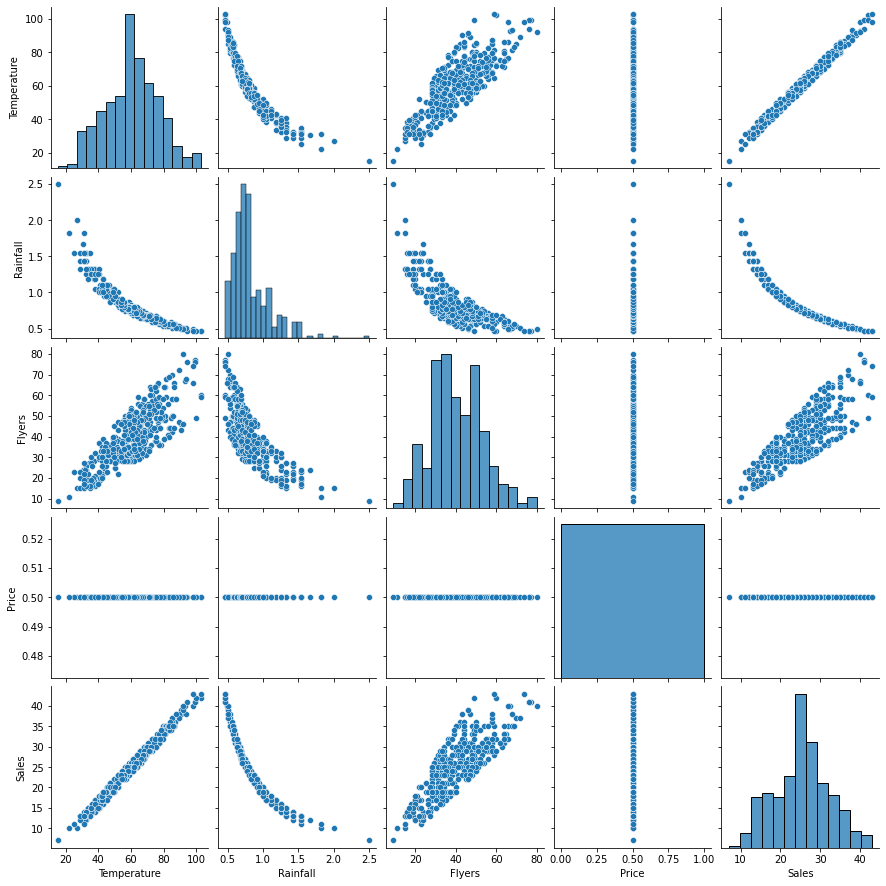

In [9]:
sns.pairplot(df)

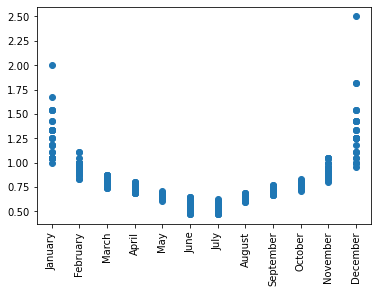

In [11]:
plt.scatter(df.Month, df.Rainfall)
plt.xticks(rotation = 90)
plt.show()

Temperature


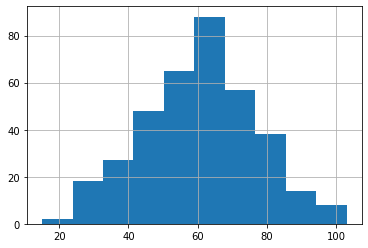

Rainfall


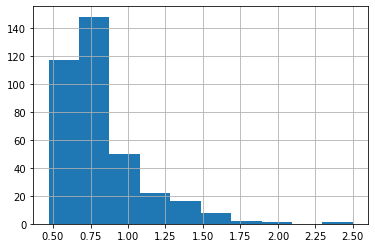

Flyers


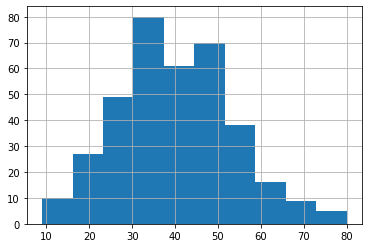

Price


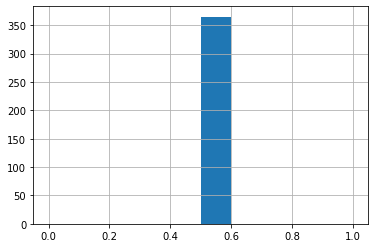

Sales


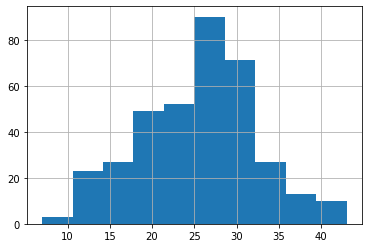

In [12]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

In [13]:
# Let's use IQR for the dataset
def get_lower_and_upper_bounds(col, multiplier = 1.5):
    """
    Positional arguments:
    col: a pandas series
    keyword arguments:
    mult: default 1.5, the magnutidue specified for the IQR rule
    
    returns:
    lower_bound and upper)bound: two float values representing the f`ence values requested.
    """

    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)

    return upper_bound, lower_bound

In [25]:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier = 1.5)
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper' : upper_bound, 'lower' : lower_bound}

In [26]:
outliers

{'Temperature': {'bounds': {'upper': 17.30000000000001,
   'lower': 103.69999999999999}},
 'Rainfall': {'bounds': {'upper': 0.26, 'lower': 1.3}},
 'Flyers': {'bounds': {'upper': 4.0, 'lower': 76.0}},
 'Price': {'bounds': {'upper': 0.5, 'lower': 0.5}},
 'Sales': {'bounds': {'upper': 5.0, 'lower': 45.0}},
 'z_scores_inf': {'bounds': {'upper': -2.6815584374324466,
   'lower': 2.6530045866440055}}}

In [27]:
df_stats = df.describe()

In [28]:
df_stats.Temperature

count    365.000000
mean      60.731233
std       16.196266
min       15.100000
25%       49.700000
50%       61.100000
75%       71.300000
max      102.900000
Name: Temperature, dtype: float64

In [29]:
z_scores = pd.Series((df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std())

In [30]:
df['z_scores_inf'] = z_scores

In [31]:
df[df['z_scores_inf'].abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_inf
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-2.082655
2017-01-06,Friday,25.3,1.54,23,0.5,11,January,-2.187617
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.381337
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June,2.072624
2017-06-26,Monday,102.6,0.47,60,0.5,42,June,2.585088
2017-07-01,Saturday,102.9,0.47,59,0.5,43,July,2.603610
2017-07-02,Sunday,93.4,0.51,68,0.5,38,July,2.017056
2017-07-10,Monday,98.0,0.49,66,0.5,40,July,2.301072
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.381337


In [32]:
df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_inf
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-2.082655
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,-1.965344
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,-1.619585
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,-1.026856
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,-1.131818
...,...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,December,-1.113296
2017-12-28,Thursday,37.8,1.25,32,0.5,16,December,-1.415835
2017-12-29,Friday,39.5,1.25,17,0.5,15,December,-1.310872


2) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns: 
    
   - Use a 2 sigma decision rule to isolate the outliers.
    
   - Do these make sense?
    
   - Should certain outliers be kept or removed?


3) Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [49]:
outliers2 = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier = 3)
        outliers2[col] = {}
        outliers2[col]['bounds'] = {'upper' : upper_bound, 'lower' : lower_bound}

In [50]:
outliers2 = pd.DataFrame(outliers)

In [51]:
outliers2.head()

,Temperature,Rainfall,Flyers,Price,Sales,z_scores_inf
bounds,"{'upper': -15.09999999999998, 'lower': 136.099...","{'upper': -0.13, 'lower': 1.69}","{'upper': -23.0, 'lower': 103.0}","{'upper': 0.5, 'lower': 0.5}","{'upper': -10.0, 'lower': 60.0}","{'upper': -4.682019571461116, 'lower': 4.65346..."


In [52]:
z_scores = pd.Series((df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std())

In [53]:
z_scores = pd.DataFrame(z_scores)

In [54]:
z_scores

,Temperature
Date,
2017-01-01,-2.082655
2017-01-02,-1.965344
2017-01-03,-1.619585
2017-01-04,-1.026856
2017-01-05,-1.131818
...,...
2017-12-27,-1.113296
2017-12-28,-1.415835
2017-12-29,-1.310872


In [55]:
z_scores[z_scores.Temperature.abs() >= 2]

,Temperature
Date,
2017-01-01,-2.082655
2017-01-06,-2.187617
2017-06-16,2.381337
2017-06-21,2.072624
2017-06-26,2.585088
2017-07-01,2.603610
2017-07-02,2.017056
2017-07-10,2.301072
2017-07-18,2.381337


In [56]:
z_scores[z_scores.Temperature.abs() >= 3]

,Temperature
Date,
